# Desain Model AI untuk Project SafeFood

### **Deskripsi Arsitektur Model Neural Network - SafeFood Project**

1. **Input Layer**:  
   - Ukuran input layer menyesuaikan dengan jumlah fitur pada dataset latih.
   - Layer ini menerima data yang sudah melalui preprocessing.

2. **Hidden Layer**:  
   - **Jumlah Hidden Layer**: 1.  
   - **Jumlah Neuron**: 96 neuron.  
   - **Fungsi Aktivasi**: ReLU (Rectified Linear Unit).  
   - **Dropout**: Dropout layer dengan tingkat dropout sebesar 20% diterapkan setelah hidden layer untuk mencegah overfitting.

3. **Output Layer**:  
   - **Jumlah Neuron**: 1 neuron (karena ini adalah tugas regresi).  
   - **Fungsi Aktivasi**: Linear (cocok untuk memprediksi nilai kontinu seperti `matching_score`).

4. **Hyperparameter Model**:  
   - **Loss Function**: Mean Squared Error (MSE).  
     - MSE dipilih karena tugas ini merupakan masalah regresi, di mana kita ingin meminimalkan rata-rata kuadrat dari kesalahan prediksi.
   - **Optimizer**: Adam Optimizer.  
     - **Learning Rate**: 0.0009686835179818646 (hasil tuning hyperparameter terbaik).  
   - **Metrics**: Mean Absolute Error (MAE) digunakan sebagai metrik evaluasi tambahan untuk memantau performa model selama pelatihan.

5. **Pengaturan Pelatihan**:  
   - **Batch Size**: 32 (mini-batch stochastic gradient descent).  
   - **Epochs**: Maksimum 50 epoch.  
   - **Callback**: Early Stopping diterapkan dengan konfigurasi:  
     - **Patience**: 5 (pelatihan dihentikan lebih awal jika validasi loss tidak membaik selama 5 epoch berturut-turut).  
     - **Restore Best Weights**: True (mengembalikan bobot model ke kondisi terbaik saat validasi loss terendah).  

6. **Evaluasi dan Penyimpanan**:  
   - Model dievaluasi menggunakan dataset test untuk menghitung `Test Loss` dan `Test MAE`.
   - Model disimpan dalam format Keras dengan nama `model_safefood_best.keras` di direktori `../models`.

7. **Visualisasi Hasil Pelatihan**:  
   - **Training vs Validation Loss**: Grafik ditampilkan untuk memantau tren loss selama pelatihan.
   - **Training vs Validation MAE**: Grafik ditampilkan untuk memantau tren MAE selama pelatihan.

---

### **Penjelasan Singkat**
Model ini dirancang untuk memprediksi nilai **matching_score** berdasarkan atribut donor dan penerima makanan. Dengan arsitektur sederhana (1 hidden layer dengan 96 neuron), model ini menggabungkan dropout untuk regularisasi dan menggunakan optimizer Adam dengan learning rate yang telah dituning.

Desain ini bertujuan untuk memastikan performa yang stabil sambil mencegah overfitting. Model dievaluasi secara menyeluruh menggunakan training, validation, dan test set.

Import Library yang dibutuhkan :

In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

print("Library berhasil diimport")

Library berhasil diimport


Muat dataset yang diperlukan :

In [2]:
# Membaca dataset
train_data = pd.read_csv('../data/processed/training_set.csv')
val_data = pd.read_csv('../data/processed/validation_set.csv')
test_data = pd.read_csv('../data/processed/test_set.csv')

# Menghapus kolom yang tidak diperlukan
x_train = train_data.drop(columns=['id_penyumbang', 'id_penerima', 'matching_score'])
y_train = train_data['matching_score']

x_val = val_data.drop(columns=['id_penyumbang', 'id_penerima', 'matching_score'])
y_val = val_data['matching_score']

x_test = test_data.drop(columns=['id_penyumbang', 'id_penerima', 'matching_score'])
y_test = test_data['matching_score']

print("Dataset berhasil diimport")

Dataset berhasil diimport


Membuat Model :

In [3]:
model = Sequential([
    InputLayer(shape=(28,)),
    Dense(96, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='linear')
])

print("Model berhasil dibuat")

Model berhasil dibuat


Mengkompilasi Model :

In [4]:
model.compile(
    loss='mse',
    optimizer=Adam(learning_rate=0.0009686835179818646),
    metrics=['mae']
)

print("Model berhasil dikompilasi")

Model berhasil dikompilasi


Melatih Model :

In [5]:
history = model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=50,
    batch_size=32,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            patience=5,
            restore_best_weights=True
        )
    ],
    verbose=1
)

Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0898 - mae: 0.2240 - val_loss: 0.0095 - val_mae: 0.0776
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0170 - mae: 0.1035 - val_loss: 0.0055 - val_mae: 0.0602
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0105 - mae: 0.0810 - val_loss: 0.0044 - val_mae: 0.0539
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0081 - mae: 0.0715 - val_loss: 0.0036 - val_mae: 0.0486
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0071 - mae: 0.0667 - val_loss: 0.0032 - val_mae: 0.0460
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0060 - mae: 0.0614 - val_loss: 0.0030 - val_mae: 0.0447
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0054 - mae: 0.0585 - val_loss: 0.0030 - val_mae: 0.0443
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0051 - mae: 0.0567 - val_loss: 0.0027 - val_mae: 0.0426
Epoch 9/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - lo

Menampilkan Plot :

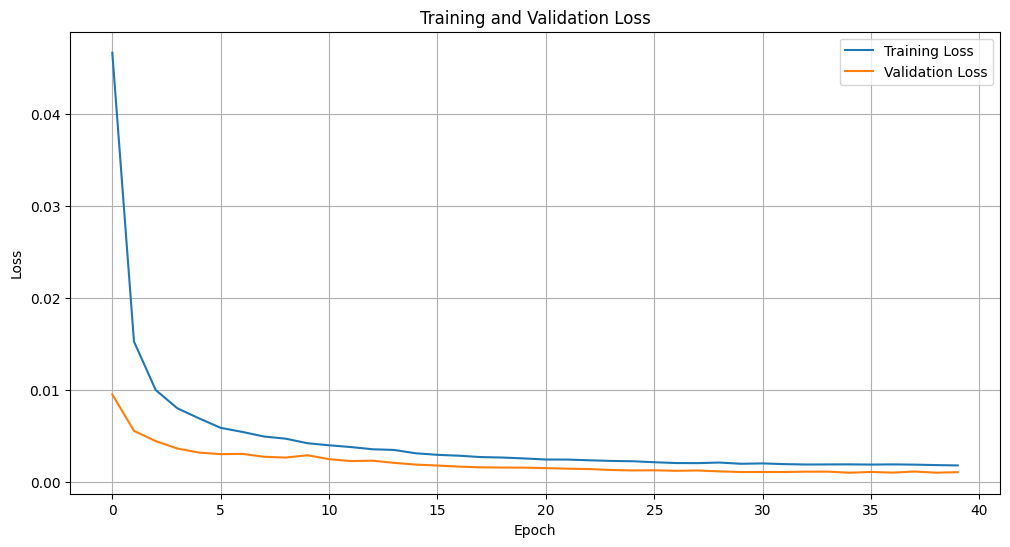

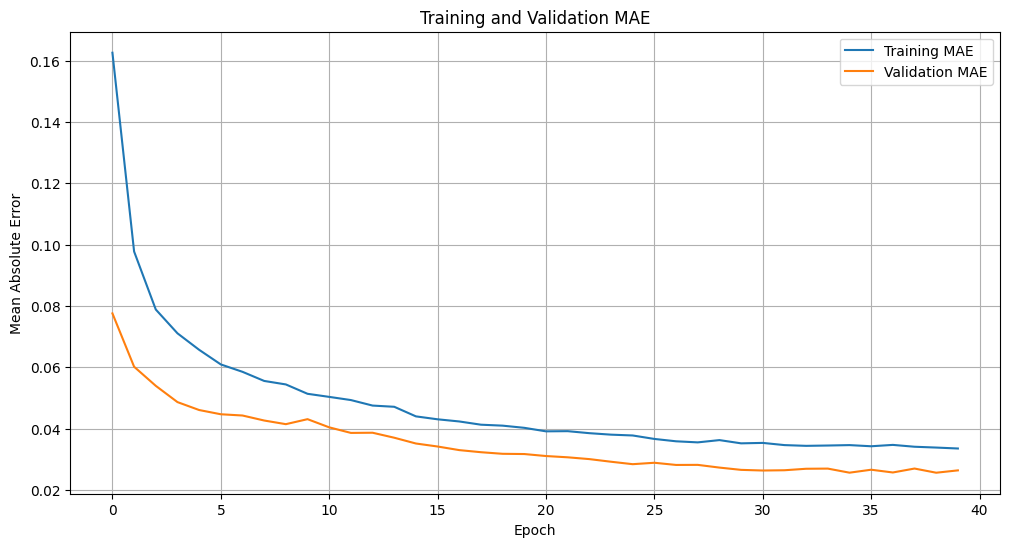

Model berhasil dilatih


In [6]:
plt.figure(figsize=(12, 6))

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))

plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')

plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.grid(True)
plt.show()

print("Model berhasil dilatih")

Evaluasi Model :

In [7]:
test_loss, test_mae = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.8709e-04 - mae: 0.0253
Test Loss: 0.0010048355907201767, Test MAE: 0.02571314014494419


Menyimpan Model :

In [18]:
# Simpan model
model.save("../models/safe_food_model.keras", save_format="keras")
print("Model berhasil disimpan dalam format HDF5 di: ../models/safe_food_model.keras")


Model berhasil disimpan dalam format HDF5 di: ../models/safe_food_model.keras


In [19]:
# Mengonversi model ke format TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Menyimpan model TFLite
tflite_model_path = "../models/safe_food_model.tflite"
with open(tflite_model_path, 'wb') as f:
    f.write(tflite_model)

print(f"Model berhasil disimpan dalam format TFLite di: {tflite_model_path}")


INFO:tensorflow:Assets written to: C:\Users\aryas\AppData\Local\Temp\tmpsx1gvk7y\assets


INFO:tensorflow:Assets written to: C:\Users\aryas\AppData\Local\Temp\tmpsx1gvk7y\assets


Saved artifact at 'C:\Users\aryas\AppData\Local\Temp\tmpsx1gvk7y'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 28), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  2473318152912: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2473318153680: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2473318153296: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2473318152528: TensorSpec(shape=(), dtype=tf.resource, name=None)
Model berhasil disimpan dalam format TFLite di: ../models/safe_food_model.tflite


In [21]:
%pip install --upgrade tensorflowjs

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

  Using cached tensorflowjs-4.22.0-py3-none-any.whl.metadata (3.2 kB)
  Using cached ml_dtypes-0.3.2-cp311-cp311-win_amd64.whl.metadata (20 kB)
  Using cached protobuf-4.25.5-cp310-abi3-win_amd64.whl.metadata (541 bytes)
  Using cached keras-2.15.0-py3-none-any.whl.metadata (2.4 kB)
Using cached tensorflowjs-4.22.0-py3-none-any.whl (89 kB)
Using cached ml_dtypes-0.3.2-cp311-cp311-win_amd64.whl (127 kB)
Using cached protobuf-4.25.5-cp310-abi3-win_amd64.whl (413 kB)
Using cached keras-2.15.0-py3-none-any.whl (1.7 MB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.1
    Uninstalling protobuf-5.29.1:
      Successfully uninstalled protobuf-5.29.1
  Attempting uninstall: ml-dtypes
    Found existing installation: ml_dtypes 0.5.0
    Uninstalling ml_dtypes-0.5.0:
      Successfully uninstalled ml_dtypes-0.5.0
  Attemp

In [20]:
import tensorflowjs as tfjs

# Menyimpan model dalam format TensorFlow.js
tfjs_model_path = "../models/safe_food_model_tfjs"
tfjs.converters.save_keras_model(model, tfjs_model_path)

print(f"Model berhasil disimpan dalam format TensorFlow.js di: {tfjs_model_path}")


ImportError: cannot import name 'disable_resource_variables' from 'tensorflow.python.ops.variable_scope' (C:\Users\aryas\AppData\Roaming\Python\Python311\site-packages\tensorflow\python\ops\variable_scope.py)